In [1]:
#Промежуточная аттестация 3

In [2]:
# Задача 1. Загрузка данных

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Путь к файлу
data_path = r"D:\Эстер\с рс\Courses\ML Engineer\Attestation3\archive\winequality-red.csv"
df = pd.read_csv(data_path)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# Задача 2. Подготовка данных к машинному обучению

# Основные статистики
stats = pd.DataFrame({
    "Пропусков (%)": df.isnull().mean() * 100,
    "Максимум": df.max(),
    "Минимум": df.min(),
    "Среднее": df.mean(),
    "Медиана": df.median(),
    "Дисперсия": df.var(),
    "Квантиль 0.1": df.quantile(0.1),
    "Квантиль 0.9": df.quantile(0.9),
    "Квартиль 1 (25%)": df.quantile(0.25),
    "Квартиль 3 (75%)": df.quantile(0.75),
})

display(stats.T)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Пропусков (%),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Максимум,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000
Минимум,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
Среднее,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
Медиана,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
Дисперсия,3.031416,0.032062,0.037947,1.987897,0.002215,109.414884,1082.102373,0.000004,0.023835,0.028733,1.135647,0.652168
Квантиль 0.1,6.500000,0.310000,0.010000,1.700000,0.060000,5.000000,14.000000,0.994556,3.120000,0.500000,9.300000,5.000000
Квантиль 0.9,10.700000,0.745000,0.522000,3.600000,0.109000,31.000000,93.200000,0.999140,3.510000,0.850000,12.000000,7.000000
Квартиль 1 (25%),7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
Квартиль 3 (75%),9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000


In [5]:
# Нормализация 
from sklearn.preprocessing import StandardScaler

# Разделим на признаки и целевой столбец
X = df.drop("quality", axis=1)
y = df["quality"]

# Масштабируем признаки
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df["quality"] = y.values  # добавляем обратно целевой столбец

# Сохраняем нормализованный датасет в .csv
X_scaled_df.to_csv("prepared_winequality_scaled.csv", index=False)
print("Нормализованные данные сохранены в файл prepared_winequality_scaled.csv")


Нормализованные данные сохранены в файл prepared_winequality_scaled.csv


In [6]:
# Задача 3. Построение моделей машинного обучения

In [7]:
!pip install xgboost
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


[notice] A new release of pip is available: 24.1.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
# Загрузка нормализованных данных
df_scaled = pd.read_csv("prepared_winequality_scaled.csv")

# Разделение на признаки и целевую переменную
X = df_scaled.drop("quality", axis=1)
y = df_scaled["quality"]

# Делим на train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Линейная регрессия
model_linreg = LinearRegression()
model_linreg.fit(X_train, y_train)
y_pred_linreg = model_linreg.predict(X_test)

# Метрики
mse = mean_squared_error(y_test, y_pred_linreg)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_linreg)
r2 = r2_score(y_test, y_pred_linreg)

print("Линейная регрессия:")
print(f"RMSE: {rmse:.3f}, MAE: {mae:.3f}, R2: {r2:.3f}")

Линейная регрессия:
RMSE: 0.625, MAE: 0.504, R2: 0.403


In [10]:
# Полиномиальная регрессия
from sklearn.linear_model import Ridge  

# Пайплайн + GridSearch
poly_pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('regressor', Ridge())
])

param_grid_poly = {
    'poly__degree': [2, 3, 4],
    'regressor__alpha': [0.01, 0.1, 1, 10]
}

grid_poly = GridSearchCV(poly_pipeline, param_grid_poly, cv=5, scoring='r2')
grid_poly.fit(X_train, y_train)

y_pred_poly = grid_poly.predict(X_test)

print("Полиномиальная регрессия:")
print(f"Лучшая степень: {grid_poly.best_params_['poly__degree']}")
print(f"R2: {r2_score(y_test, y_pred_poly):.3f}")


Полиномиальная регрессия:
Лучшая степень: 2
R2: 0.421


In [11]:
# Ridge регрессия
ridge = Ridge()
params_ridge = {'alpha': [0.01, 0.1, 1, 10, 100]}
grid_ridge = GridSearchCV(ridge, params_ridge, cv=5, scoring='r2')
grid_ridge.fit(X_train, y_train)

y_pred_ridge = grid_ridge.predict(X_test)

print("Ridge регрессия:")
print(f"Лучший alpha: {grid_ridge.best_params_['alpha']}")
print(f"R2: {r2_score(y_test, y_pred_ridge):.3f}")


Ridge регрессия:
Лучший alpha: 100
R2: 0.399


In [12]:
# Lasso регрессия
lasso = Lasso(max_iter=10000)
params_lasso = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
grid_lasso = GridSearchCV(lasso, params_lasso, cv=5, scoring='r2')
grid_lasso.fit(X_train, y_train)

y_pred_lasso = grid_lasso.predict(X_test)

print("Lasso регрессия:")
print(f"Лучший alpha: {grid_lasso.best_params_['alpha']}")
print(f"R2: {r2_score(y_test, y_pred_lasso):.3f}")


Lasso регрессия:
Лучший alpha: 0.01
R2: 0.399


In [13]:
# ElasticNet регрессия
elastic = ElasticNet(max_iter=10000)
params_enet = {
    'alpha': [0.001, 0.01, 0.1, 1],
    'l1_ratio': [0.2, 0.5, 0.8]
}

grid_enet = GridSearchCV(elastic, params_enet, cv=5, scoring='r2')
grid_enet.fit(X_train, y_train)

y_pred_enet = grid_enet.predict(X_test)

print("ElasticNet регрессия:")
print(f"Лучшие параметры: {grid_enet.best_params_}")
print(f"R2: {r2_score(y_test, y_pred_enet):.3f}")


ElasticNet регрессия:
Лучшие параметры: {'alpha': 0.01, 'l1_ratio': 0.8}
R2: 0.399


In [14]:
# KNN регрессия
knn = KNeighborsRegressor()
params_knn = {'n_neighbors': [3, 5, 7, 9]}
grid_knn = GridSearchCV(knn, params_knn, cv=5, scoring='r2')
grid_knn.fit(X_train, y_train)

y_pred_knn = grid_knn.predict(X_test)

print("KNN регрессия:")
print(f"Лучшее количество соседей: {grid_knn.best_params_['n_neighbors']}")
print(f"R2: {r2_score(y_test, y_pred_knn):.3f}")


KNN регрессия:
Лучшее количество соседей: 9
R2: 0.366


In [15]:
# Support Vector Regression
svr = SVR()
params_svr = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'linear'],
    'epsilon': [0.1, 0.2]
}

grid_svr = GridSearchCV(svr, params_svr, cv=3, scoring='r2')
grid_svr.fit(X_train, y_train)

y_pred_svr = grid_svr.predict(X_test)

print("SVR:")
print(f"Лучшие параметры: {grid_svr.best_params_}")
print(f"R2: {r2_score(y_test, y_pred_svr):.3f}")


SVR:
Лучшие параметры: {'C': 1, 'epsilon': 0.2, 'kernel': 'rbf'}
R2: 0.471


In [16]:
# Decision Tree Regressor
tree = DecisionTreeRegressor(random_state=42)
params_tree = {
    'max_depth': [3, 5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

grid_tree = GridSearchCV(tree, params_tree, cv=5, scoring='r2')
grid_tree.fit(X_train, y_train)

y_pred_tree = grid_tree.predict(X_test)

print("Дерево решений:")
print(f"Лучшие параметры: {grid_tree.best_params_}")
print(f"R2: {r2_score(y_test, y_pred_tree):.3f}")


Дерево решений:
Лучшие параметры: {'max_depth': 3, 'min_samples_split': 2}
R2: 0.288


In [17]:
# Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
params_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20]
}

grid_rf = GridSearchCV(rf, params_rf, cv=3, scoring='r2')
grid_rf.fit(X_train, y_train)

y_pred_rf = grid_rf.predict(X_test)

print("Random Forest:")
print(f"Лучшие параметры: {grid_rf.best_params_}")
print(f"R2: {r2_score(y_test, y_pred_rf):.3f}")


Random Forest:
Лучшие параметры: {'max_depth': 20, 'n_estimators': 50}
R2: 0.532


In [18]:
#  Градиентный бустинг
xgb = XGBRegressor(random_state=42, verbosity=0)
params_xgb = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1]
}

grid_xgb = GridSearchCV(xgb, params_xgb, cv=3, scoring='r2')
grid_xgb.fit(X_train, y_train)

y_pred_xgb = grid_xgb.predict(X_test)

print("XGBoost:")
print(f"Лучшие параметры: {grid_xgb.best_params_}")
print(f"R2: {r2_score(y_test, y_pred_xgb):.3f}")


XGBoost:
Лучшие параметры: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}
R2: 0.462


In [19]:
# Сравнение моделей по метрикам
# Словарь для хранения метрик
results = {
    "Модель": [
        "Линейная регрессия",
        "Полиномиальная регрессия",
        "Ridge",
        "Lasso",
        "ElasticNet",
        "KNN",
        "SVR",
        "Дерево решений",
        "Random Forest",
        "XGBoost"
    ],
    "RMSE": [
        np.sqrt(mean_squared_error(y_test, y_pred_linreg)),
        np.sqrt(mean_squared_error(y_test, y_pred_poly)),
        np.sqrt(mean_squared_error(y_test, grid_ridge.predict(X_test))),
        np.sqrt(mean_squared_error(y_test, grid_lasso.predict(X_test))),
        np.sqrt(mean_squared_error(y_test, grid_enet.predict(X_test))),
        np.sqrt(mean_squared_error(y_test, y_pred_knn)),
        np.sqrt(mean_squared_error(y_test, y_pred_svr)),
        np.sqrt(mean_squared_error(y_test, y_pred_tree)),
        np.sqrt(mean_squared_error(y_test, y_pred_rf)),
        np.sqrt(mean_squared_error(y_test, y_pred_xgb)),
    ],
    "MAE": [
        mean_absolute_error(y_test, y_pred_linreg),
        mean_absolute_error(y_test, y_pred_poly),
        mean_absolute_error(y_test, grid_ridge.predict(X_test)),
        mean_absolute_error(y_test, grid_lasso.predict(X_test)),
        mean_absolute_error(y_test, grid_enet.predict(X_test)),
        mean_absolute_error(y_test, y_pred_knn),
        mean_absolute_error(y_test, y_pred_svr),
        mean_absolute_error(y_test, y_pred_tree),
        mean_absolute_error(y_test, y_pred_rf),
        mean_absolute_error(y_test, y_pred_xgb),
    ],
    "R2": [
        r2_score(y_test, y_pred_linreg),
        r2_score(y_test, y_pred_poly),
        r2_score(y_test, grid_ridge.predict(X_test)),
        r2_score(y_test, grid_lasso.predict(X_test)),
        r2_score(y_test, grid_enet.predict(X_test)),
        r2_score(y_test, y_pred_knn),
        r2_score(y_test, y_pred_svr),
        r2_score(y_test, y_pred_tree),
        r2_score(y_test, y_pred_rf),
        r2_score(y_test, y_pred_xgb),
    ]
}
results_df = pd.DataFrame(results)

results_df.to_csv("regression_model_results.csv", index=False)

display(results_df)


,Модель,RMSE,MAE,R2
0,Линейная регрессия,0.624520,0.503530,0.403180
1,Полиномиальная регрессия,0.615145,0.493296,0.420963
2,Ridge,0.626592,0.506864,0.399213
3,Lasso,0.626853,0.507676,0.398712
4,ElasticNet,0.626588,0.506982,0.399221
5,KNN,0.643462,0.504861,0.366428
6,SVR,0.587701,0.462840,0.471478
7,Дерево решений,0.682050,0.540976,0.288160
8,Random Forest,0.552929,0.426772,0.532169
9,XGBoost,0.593034,0.440184,0.461841


C:\Users\gis\AppData\Local\Temp\ipykernel_5612\737102162.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df.sort_values("R2", ascending=False), x="R2", y="Модель", palette="viridis")


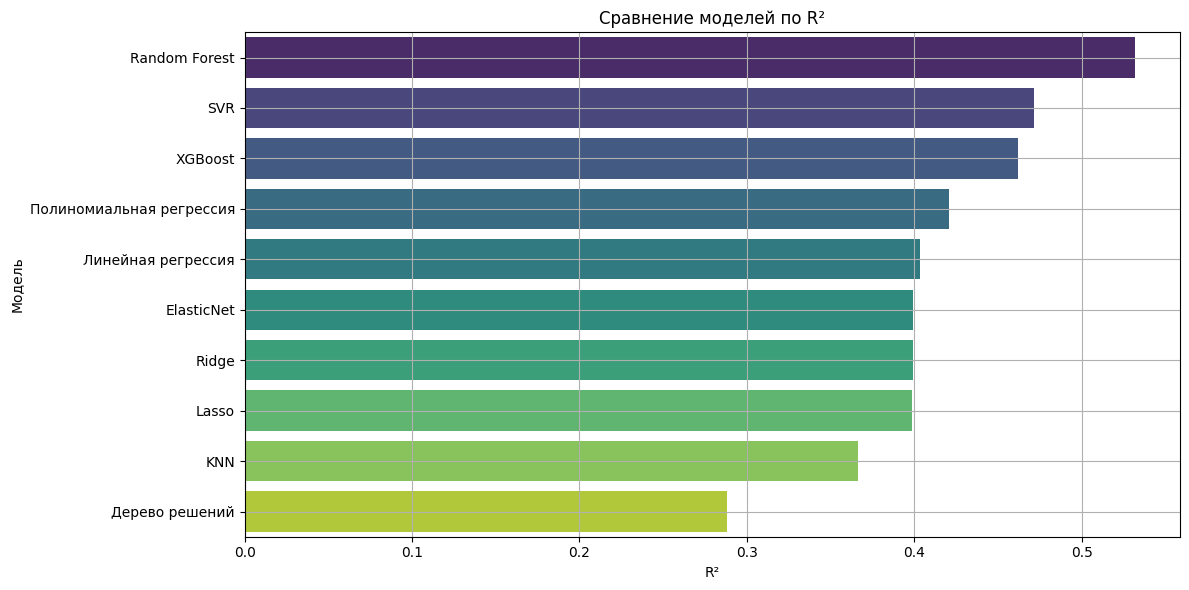

In [20]:
# Визуализация сравнения моделей по R²
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df.sort_values("R2", ascending=False), x="R2", y="Модель", palette="viridis")
plt.title("Сравнение моделей по R²")
plt.xlabel("R²")
plt.ylabel("Модель")
plt.grid(True)
plt.tight_layout()
plt.show()


In [21]:
# Сохранение моделей
import joblib

# Сохраняем лучшие модели
joblib.dump(grid_rf.best_estimator_, "random_forest_model.pkl")
joblib.dump(grid_xgb.best_estimator_, "xgboost_model.pkl")
joblib.dump(grid_svr.best_estimator_, "svr_model.pkl")

# Формируем таблицу 
best_models_analysis = pd.DataFrame({
    "Модель": ["Random Forest", "XGBoost", "SVR"],
    "RMSE": [
        results_df.loc[results_df["Модель"] == "Random Forest", "RMSE"].values[0],
        results_df.loc[results_df["Модель"] == "XGBoost", "RMSE"].values[0],
        results_df.loc[results_df["Модель"] == "SVR", "RMSE"].values[0]
    ],
    "MAE": [
        results_df.loc[results_df["Модель"] == "Random Forest", "MAE"].values[0],
        results_df.loc[results_df["Модель"] == "XGBoost", "MAE"].values[0],
        results_df.loc[results_df["Модель"] == "SVR", "MAE"].values[0]
    ],
    "R2": [
        results_df.loc[results_df["Модель"] == "Random Forest", "R2"].values[0],
        results_df.loc[results_df["Модель"] == "XGBoost", "R2"].values[0],
        results_df.loc[results_df["Модель"] == "SVR", "R2"].values[0]
    ]
})

# Сохраняем анализ в CSV
best_models_analysis.to_csv("best_models_analysis.csv", index=False)

print("Лучшие модели сохранены, анализ записан в 'best_models_analysis.csv'")


Лучшие модели сохранены, анализ записан в 'best_models_analysis.csv'


In [22]:
# Задача 4. Применение инструментов AutoML
!pip install pycaret


[notice] A new release of pip is available: 24.1.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
from pycaret.regression import *

data_pycaret = pd.concat([X, y], axis=1)

# Настройка AutoML-сессии 
reg_setup = setup(
    data=data_pycaret,
    target='quality',
    session_id=123,
    normalize=True,
    verbose=False
)


In [25]:
# Сравнение моделей
best_model = compare_models()

# Визуализация и оценка
evaluate_model(best_model)

# Сохранение модели
save_model(best_model, "best_pycaret_model")

# Сохранение результатов сравнения
pycaret_results = pull()
pycaret_results.to_csv("pycaret_model_results.csv", index=False)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.3947,0.3445,0.5850,0.4699,0.0910,0.0731,0.0380
rf,Random Forest Regressor,0.4329,0.3551,0.5942,0.4537,0.0926,0.0800,0.0670
lightgbm,Light Gradient Boosting Machine,0.4369,0.3616,0.5992,0.4430,0.0929,0.0803,0.0550
gbr,Gradient Boosting Regressor,0.4863,0.4021,0.6328,0.3815,0.0981,0.0894,0.0330
xgboost,Extreme Gradient Boosting,0.4322,0.4032,0.6336,0.3784,0.0985,0.0799,0.0280
ada,AdaBoost Regressor,0.5132,0.4222,0.6485,0.3504,0.1005,0.0949,0.0240
br,Bayesian Ridge,0.5046,0.4304,0.6552,0.3345,0.1011,0.0926,0.0090
ridge,Ridge Regression,0.5043,0.4315,0.6560,0.3327,0.1012,0.0925,0.0100
lr,Linear Regression,0.5044,0.4316,0.6561,0.3325,0.1012,0.0925,0.3960
lar,Least Angle Regression,0.5045,0.4317,0.6562,0.3323,0.1012,0.0926,0.0070


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Transformation Pipeline and Model Successfully Saved


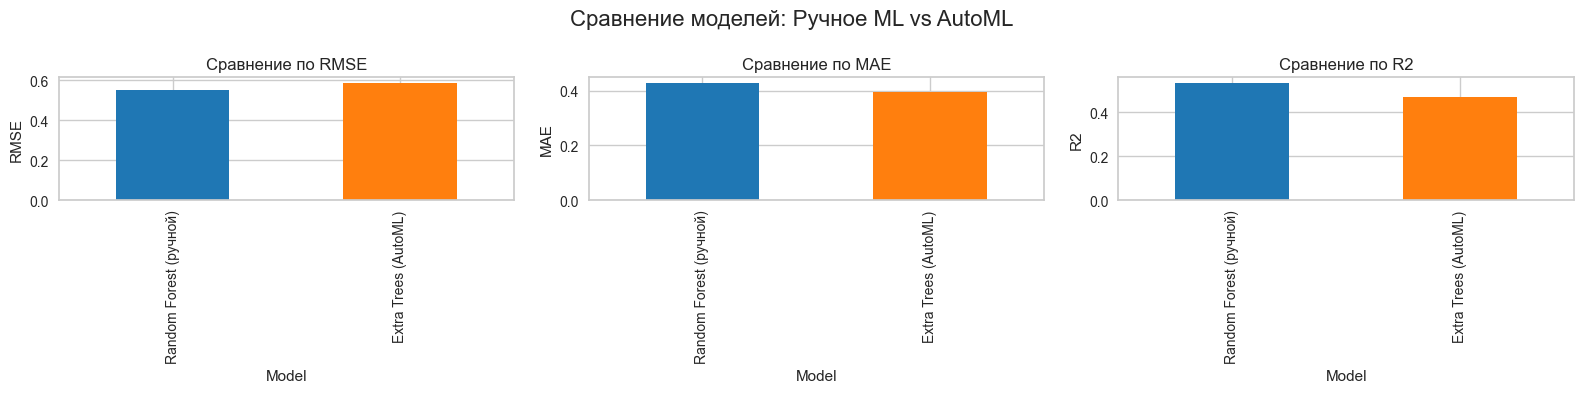

In [26]:
# Сравнительный график ручного ML и AutoML
# Результаты ручного ML (лучшая модель)
manual_results = {
    'Model': 'Random Forest (ручной)',
    'RMSE': 0.5529,
    'MAE': 0.4268,
    'R2': 0.5322
}

# Результаты AutoML (лучшая модель)
automl_results = {
    'Model': 'Extra Trees (AutoML)',
    'RMSE': 0.5850,
    'MAE': 0.3947,
    'R2': 0.4699
}

final_df = pd.DataFrame([manual_results, automl_results])
final_df.set_index("Model", inplace=True)

# Построение графиков
fig, axes = plt.subplots(1, 3, figsize=(16, 4))
metrics = ['RMSE', 'MAE', 'R2']
colors = ['#1f77b4', '#ff7f0e']

for i, metric in enumerate(metrics):
    final_df[metric].plot(kind='bar', ax=axes[i], color=colors)
    axes[i].set_title(f'Сравнение по {metric}')
    axes[i].set_ylabel(metric)
    axes[i].grid(True)

plt.suptitle("Сравнение моделей: Ручное ML vs AutoML", fontsize=16)
plt.tight_layout()
plt.show()

In [28]:
# Сохранение итогов в CSV
final_df.to_csv("final_model_comparison.csv", encoding='utf-8-sig')
